In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [77]:
X = df.drop(columns=["sales"])
y = df.sales
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=2)

In [78]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
R2_train = lreg.score(X_train, y_train)
R2_test = lreg.score(X_test, y_test)

data = lreg.coef_.tolist()
data.insert(0,lreg.intercept_)
index = X.columns.insert(0,"Intercept")
dg = pd.DataFrame(data=data, index=index, columns=['Beta Value'])
display(dg)
print(f"{'R2 Train Score':<15}: {R2_train:>2.4f}")
print(f"{'R2 Test Score':<15}: {R2_test:>2.4f}")


,Beta Value
Intercept,3.054452
TV,0.047353
radio,0.173238
newspaper,0.004665


R2 Train Score : 0.9152
R2 Test Score  : 0.7576


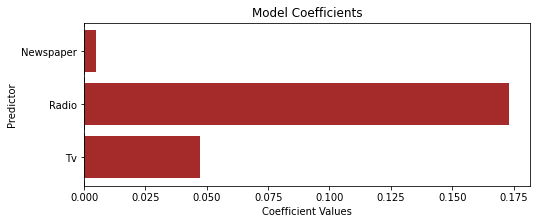

In [79]:
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(list(map(lambda x: x.title(),X.columns)), lreg.coef_, color='brown')
plt.title(label='Model Coefficients')
ax.axvline(0,ls='--', c='black')
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.show()

In [80]:
# create a new DataFrame to store the converted budgets
X2 = pd.DataFrame()
X2['TV (Rupee)'] = 200 * df['TV'] # convert to Sri Lankan Rupee
X2['radio (Won)'] = 1175 * df['radio'] # convert to South Korean Won
X2['newspaper (Cedi)'] = 6 * df['newspaper'] # Convert to Ghanaian Cedi

In [81]:
lreg2 = LinearRegression().fit(X2,y)
print(f'{"Model Coefficients":>16}')
for col, coef in zip(X2.columns, lreg2.coef_):
    print(f'{col:>16}: {coef:>8.5f}')
print(f'\nR^2: {lreg2.score(X2,y):.4}')

Model Coefficients
      TV (Rupee):  0.00023
     radio (Won):  0.00016
newspaper (Cedi): -0.00017

R^2: 0.8972


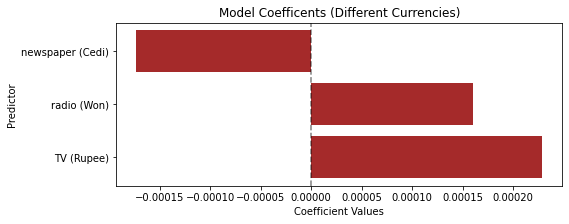

In [82]:
plt.figure(figsize=(8,3))
plt.barh(X2.columns, lreg2.coef_, color='brown')
plt.axvline(0, c='k', ls='--', alpha=0.5)
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Model Coefficents (Different Currencies)');

In [84]:
import seaborn as sns

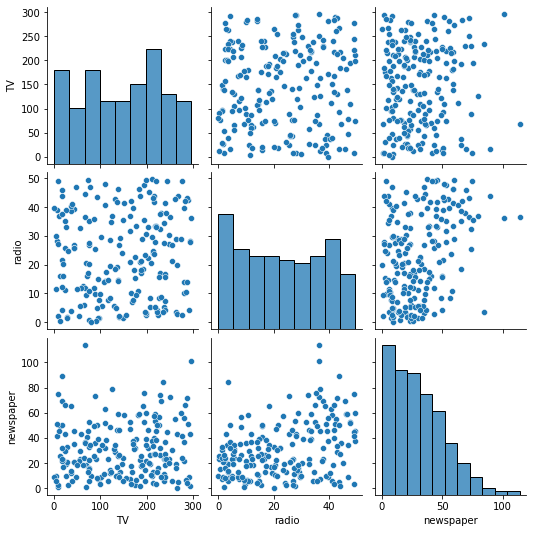

In [86]:
sns.pairplot(X)
plt.show()